In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import bokeh.plotting as bk
from scipy.stats import ttest_ind
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
data = pd.read_csv('/content/drive/MyDrive/dataset/Afame tech/HR Data.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [7]:
data.shape

(1470, 35)

In [8]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<Axes: >

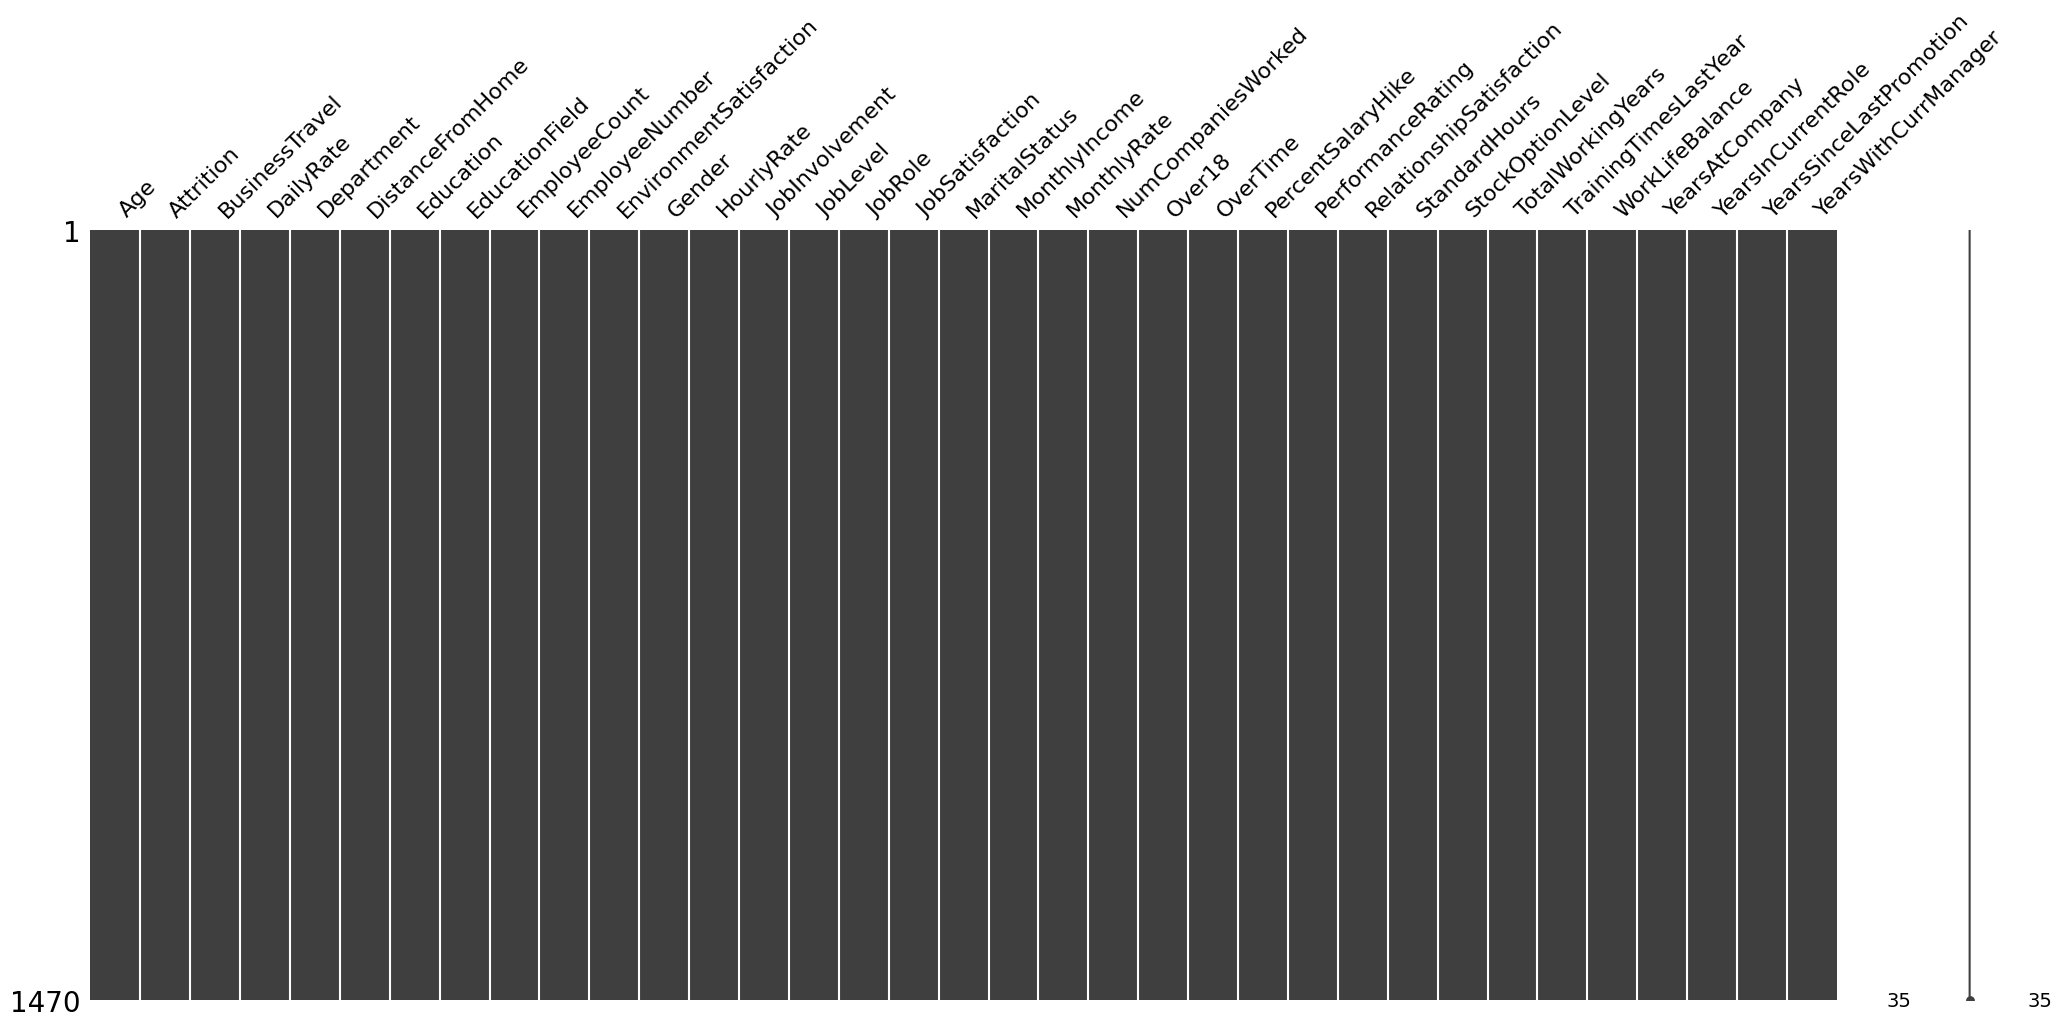

In [12]:
msno.matrix(data)

In [13]:

data = data.drop('EmployeeNumber', axis=1)

# Renaming the columns

In [14]:

data = data.rename(columns={'DailyRate': 'daily_rate', 'DistanceFromHome': 'distance_from_home', 'EducationField': 'education_field', 'EmployeeCount': 'employee_count', 'EnvironmentSatisfaction': 'environment_satisfaction', 'HourlyRate': 'hourly_rate', 'JobInvolvement': 'job_involvement', 'JobLevel': 'job_level', 'JobRole': 'job_role', 'JobSatisfaction': 'job_satisfaction', 'MaritalStatus': 'marital_status', 'MonthlyIncome': 'monthly_income', 'MonthlyRate': 'monthly_rate', 'NumCompaniesWorked': 'num_companies_worked', 'PercentSalaryHike': 'percent_salary_hike', 'PerformanceRating': 'performance_rating', 'RelationshipSatisfaction': 'relationship_satisfaction', 'StockOptionLevel': 'stock_option_level', 'TotalWorkingYears': 'total_working_years', 'TrainingTimesLastYear': 'training_times_last_year', 'WorkLifeBalance': 'work_life_balance', 'YearsAtCompany': 'years_at_company', 'YearsInCurrentRole': 'years_in_current_role', 'YearsSinceLastPromotion': 'years_since_last_promotion', 'YearsWithCurrManager': 'years_with_curr_manager'})

In [15]:

data = data.drop_duplicates()

In [16]:
# Sanitize specific columns

data['BusinessTravel'] = data['BusinessTravel'].str.lower().str.strip()

In [17]:

data = data.dropna()

# Storing Cleaned dataset

In [18]:

data.to_csv('cleaned_dataset.csv')

In [20]:
df = pd.read_csv('/content/cleaned_dataset.csv')
df

,Unnamed: 0,Age,Attrition,BusinessTravel,daily_rate,Department,distance_from_home,Education,education_field,employee_count,...,relationship_satisfaction,StandardHours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,0,41,Yes,travel_rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1,49,No,travel_frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,2,37,Yes,travel_rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,3,33,No,travel_frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,4,27,No,travel_rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1465,36,No,travel_frequently,884,Research & Development,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
1466,1466,39,No,travel_rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
1467,1467,27,No,travel_rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
1468,1468,49,No,travel_frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8


In [21]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [22]:
df.head()

,Age,Attrition,BusinessTravel,daily_rate,Department,distance_from_home,Education,education_field,employee_count,environment_satisfaction,...,relationship_satisfaction,StandardHours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,Yes,travel_rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,No,travel_frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,travel_rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,travel_frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,travel_rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         1470 non-null   int64 
 1   Attrition                   1470 non-null   object
 2   BusinessTravel              1470 non-null   object
 3   daily_rate                  1470 non-null   int64 
 4   Department                  1470 non-null   object
 5   distance_from_home          1470 non-null   int64 
 6   Education                   1470 non-null   int64 
 7   education_field             1470 non-null   object
 8   employee_count              1470 non-null   int64 
 9   environment_satisfaction    1470 non-null   int64 
 10  Gender                      1470 non-null   object
 11  hourly_rate                 1470 non-null   int64 
 12  job_involvement             1470 non-null   int64 
 13  job_level                   1470 non-null   int6

In [24]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'daily_rate', 'Department',
       'distance_from_home', 'Education', 'education_field', 'employee_count',
       'environment_satisfaction', 'Gender', 'hourly_rate', 'job_involvement',
       'job_level', 'job_role', 'job_satisfaction', 'marital_status',
       'monthly_income', 'monthly_rate', 'num_companies_worked', 'Over18',
       'OverTime', 'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction', 'StandardHours', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager'],
      dtype='object')

#Encoding

In [25]:

le = LabelEncoder()
for column in df.select_dtypes(include='object'):
    df[column] = le.fit_transform(df[column])
df.head()


,Age,Attrition,BusinessTravel,daily_rate,Department,distance_from_home,Education,education_field,employee_count,environment_satisfaction,...,relationship_satisfaction,StandardHours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,1,2,1102,2,1,2,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,3,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,4,80,1,6,3,3,2,2,2,2


In [26]:
df.isnull().sum()

Age                           0
Attrition                     0
BusinessTravel                0
daily_rate                    0
Department                    0
distance_from_home            0
Education                     0
education_field               0
employee_count                0
environment_satisfaction      0
Gender                        0
hourly_rate                   0
job_involvement               0
job_level                     0
job_role                      0
job_satisfaction              0
marital_status                0
monthly_income                0
monthly_rate                  0
num_companies_worked          0
Over18                        0
OverTime                      0
percent_salary_hike           0
performance_rating            0
relationship_satisfaction     0
StandardHours                 0
stock_option_level            0
total_working_years           0
training_times_last_year      0
work_life_balance             0
years_at_company              0
years_in

In [27]:
df

,Age,Attrition,BusinessTravel,daily_rate,Department,distance_from_home,Education,education_field,employee_count,environment_satisfaction,...,relationship_satisfaction,StandardHours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,1,2,1102,2,1,2,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,3,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,4,...,4,80,0,17,3,2,9,6,0,8


#EDA


In [61]:
# Define the columns you want to plot
columns_to_plot = ['Age', 'daily_rate', 'hourly_rate', 'monthly_income', 'monthly_rate', 'total_working_years']

# Initialize the figure
fig = make_subplots(rows=3, cols=2, subplot_titles=columns_to_plot)

for i, column in enumerate(columns_to_plot):
    row = i // 2 + 1
    col = i % 2 + 1
    fig.add_trace(go.Histogram(x=df[column]), row=row, col=col)

fig.update_layout(height=1000, width=1000, title='Histograms of df')
fig.show()

<ipython-input-30-7a9b53a6f8e2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['environment_satisfaction'], hist=False, color='r', kde=True, kde_kws={'shade': True, 'linewidth': 3})
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-30-7a9b53a6f8e2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `di

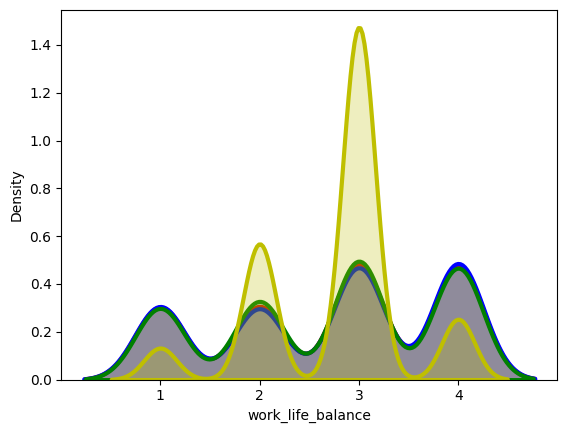

In [30]:
sns.distplot(df['environment_satisfaction'], hist=False, color='r', kde=True, kde_kws={'shade': True, 'linewidth': 3})
sns.distplot(df['job_satisfaction'], hist=False, color='b', kde=True, kde_kws={'shade': True, 'linewidth': 3})
sns.distplot(df['relationship_satisfaction'], hist=False, color='g', kde=True, kde_kws={'shade': True, 'linewidth': 3})
sns.distplot(df['work_life_balance'], hist=False, color='y', kde=True, kde_kws={'shade': True, 'linewidth': 3})
plt.show()

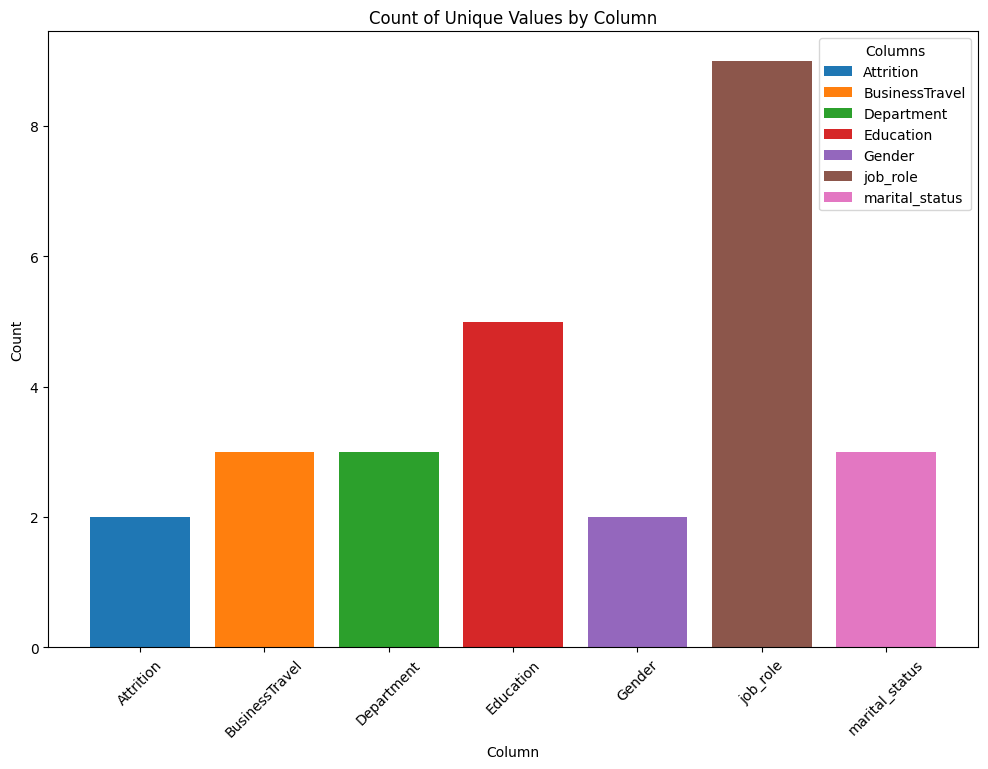

In [31]:
columns = ['Attrition', 'BusinessTravel', 'Department', 'Education', 'Gender', 'job_role', 'marital_status']

fig, ax = plt.subplots(figsize=(12, 8))

for i, col in enumerate(columns):
    values = df[col].value_counts()
    ax.bar(i, values.count(), label=col)

ax.set_xticks(range(len(columns)))
ax.set_xticklabels(columns, rotation=45)

ax.set_title('Count of Unique Values by Column')
ax.set_xlabel('Column')
ax.set_ylabel('Count')

ax.legend(title='Columns')

plt.show()

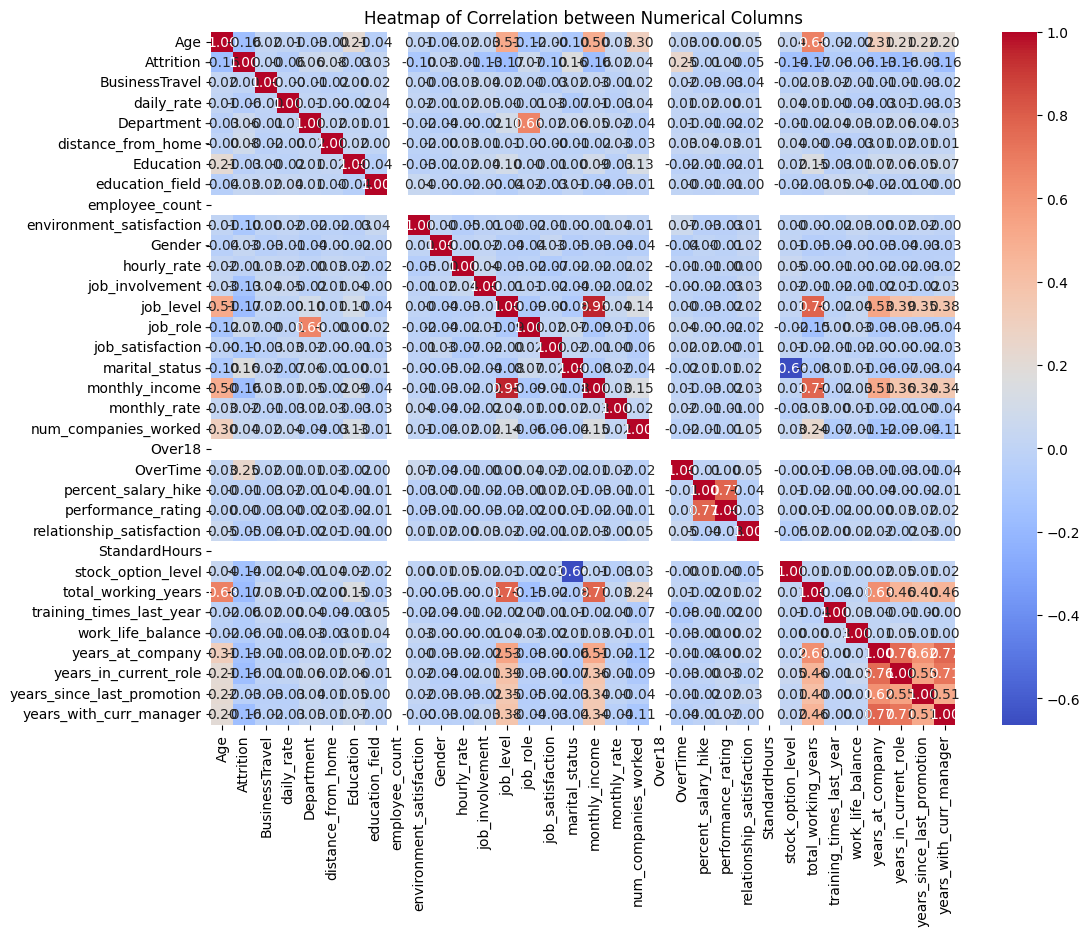

In [32]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation between Numerical Columns')
plt.show()

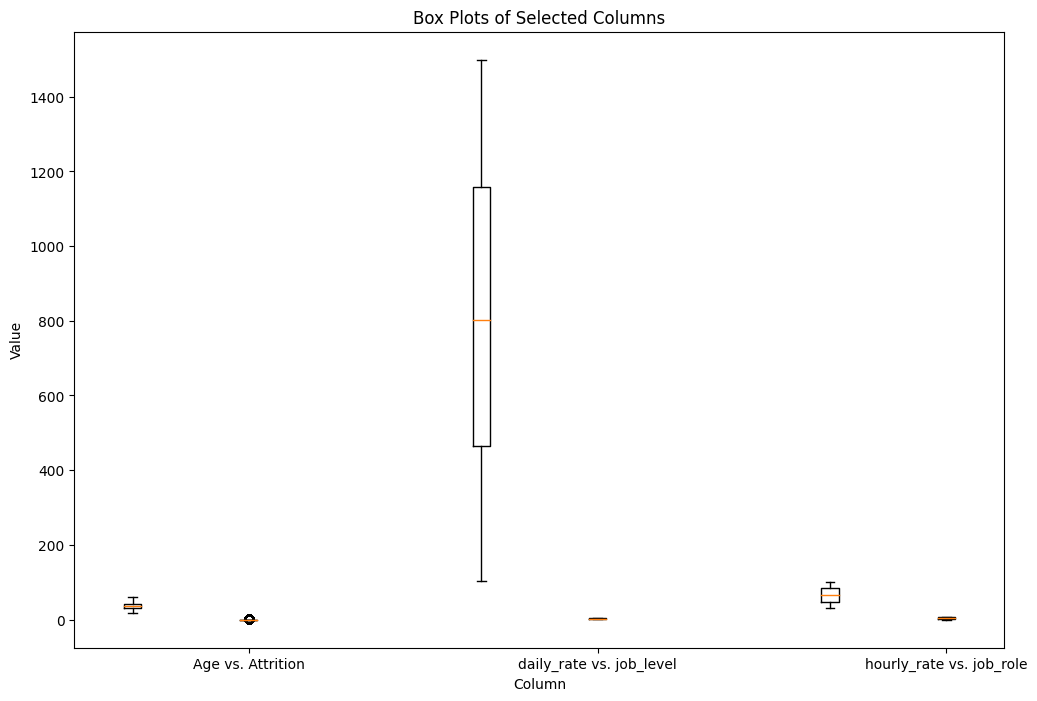

In [33]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.boxplot([df['Age'], df['Attrition']], positions=[1, 2], labels=['Age', 'Attrition'])
ax.boxplot([df['daily_rate'], df['job_level']], positions=[4, 5], labels=['daily_rate', 'job_level'])
ax.boxplot([df['hourly_rate'], df['job_role']], positions=[7, 8], labels=['hourly_rate', 'job_role'])

ax.set_xticks([2, 5, 8])
ax.set_xticklabels(['Age vs. Attrition', 'daily_rate vs. job_level', 'hourly_rate vs. job_role'])

ax.set_title('Box Plots of Selected Columns')
ax.set_xlabel('Column')
ax.set_ylabel('Value')
plt.show()

In [34]:
fig = px.scatter(df, x="Age", y="monthly_income", hover_data=["job_role", "Department"])

fig.update_layout(
    title="Scatter Plot of Age vs. Monthly Income",
    xaxis_title="Age",
    yaxis_title="Monthly Income",
)


fig.show()

source = bk.ColumnDataSource(data=df)
p = bk.figure(title="Bar Chart of Attrition by Department", x_range=df["Department"].astype(str).unique().tolist())

df_grouped = df.groupby("Department")["Attrition"].sum().reset_index()
source = bk.ColumnDataSource(data=df_grouped)
p = bk.figure(title="Bar Chart of Attrition by Department", x_range=df_grouped["Department"].astype(str).unique().tolist())
p.vbar(x="Department", top="Attrition", source=source, width=0.5, legend_field="Department")
p.legend.location = "top_left"
bk.show(p)

# Hypothesis Testing

In [35]:
male_income = data[data['Gender'] == 'Male']['monthly_income']
female_income = data[data['Gender'] == 'Female']['monthly_income']
ttest_result = ttest_ind(male_income, female_income)
print(f"t-statistic: {ttest_result.statistic:.2f}, p-value: {ttest_result.pvalue:.4f}")

t-statistic: -1.22, p-value: 0.2222


# ANOVA (Analysis of Variance)

In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('monthly_income ~ C(Department)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                     sum_sq      df         F    PR(>F)
C(Department)  1.415099e+08     2.0  3.201783  0.040974
Residual       3.241867e+10  1467.0       NaN       NaN


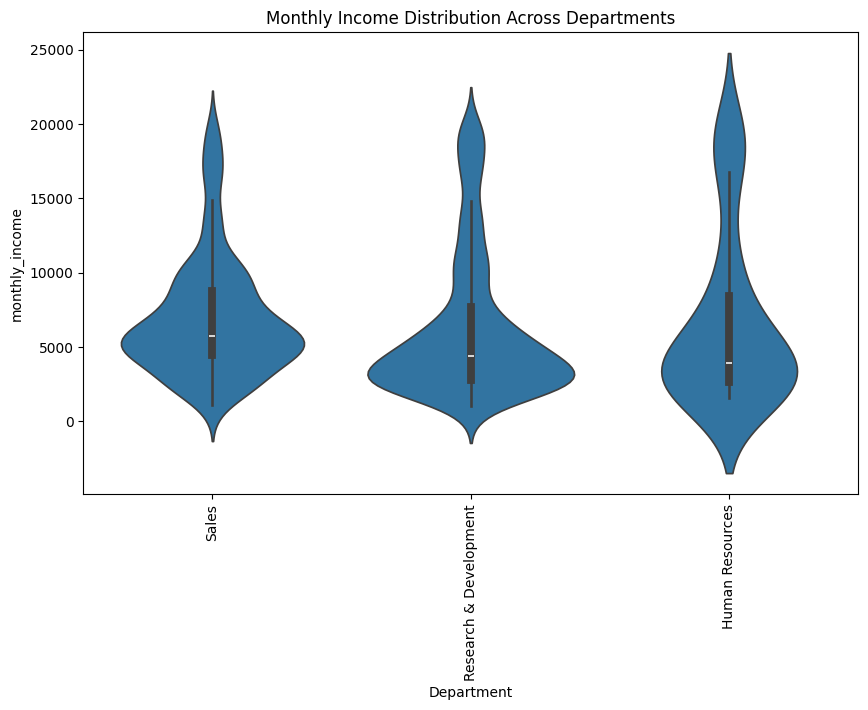

In [37]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Department', y='monthly_income', data=data)
plt.xticks(rotation=90)
plt.title('Monthly Income Distribution Across Departments')
plt.show()

#Techniques like PCA (Principal Component Analysis) or t-SNE (t-Distributed Stochastic Neighbor Embedding) to reduce the dimensionality of the dataset and visualize the relationships between columns.

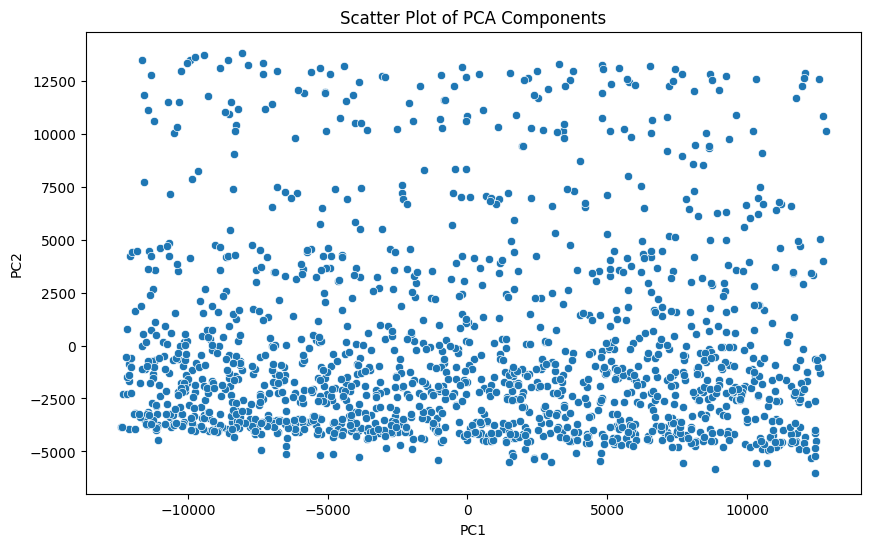

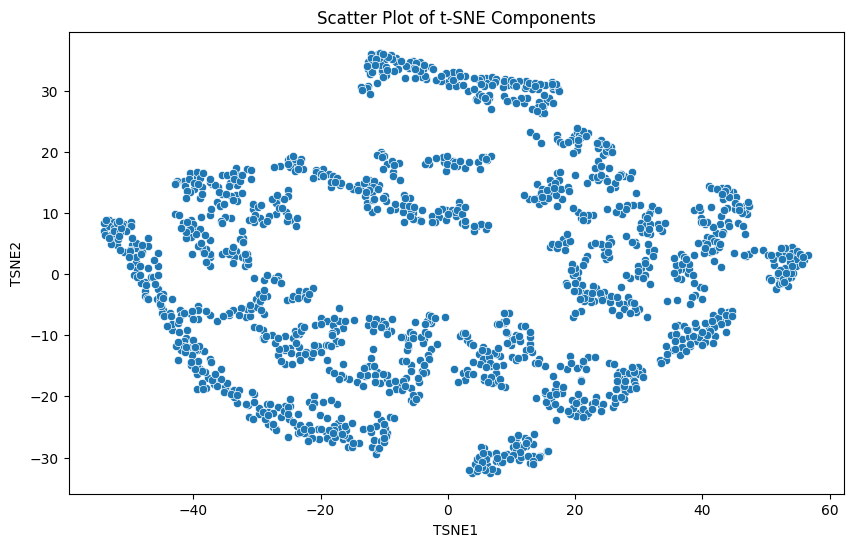

In [38]:
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df), columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('Scatter Plot of PCA Components')
plt.show()
tsne = TSNE(n_components=2)
df_tsne = pd.DataFrame(tsne.fit_transform(df), columns=['TSNE1', 'TSNE2'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', data=df_tsne)
plt.title('Scatter Plot of t-SNE Components')
plt.show()

# Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



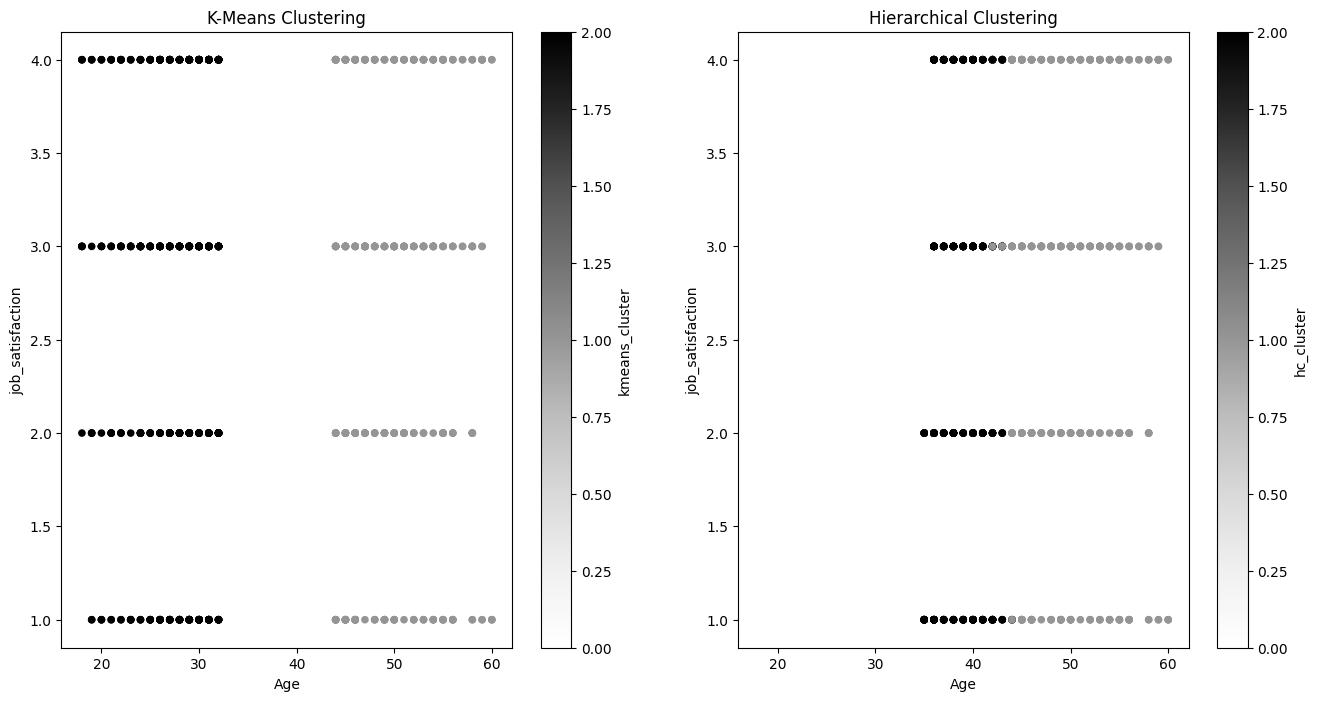

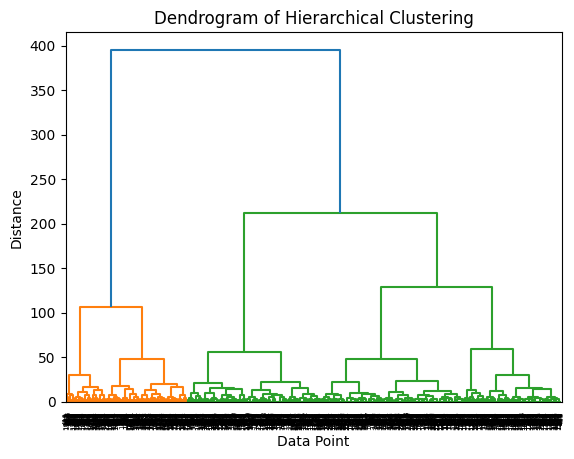

In [39]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['kmeans_cluster'] = kmeans.fit_predict(df[['Age', 'job_level', 'job_satisfaction']])

hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
df['hc_cluster'] = hc.fit_predict(df[['Age', 'job_level', 'job_satisfaction']])

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

df.plot.scatter(x='Age', y='job_satisfaction', c='kmeans_cluster', ax=axes[0])
axes[0].set_title('K-Means Clustering')

df.plot.scatter(x='Age', y='job_satisfaction', c='hc_cluster', ax=axes[1])
axes[1].set_title('Hierarchical Clustering')

plt.show()

dendrogram = sch.dendrogram(sch.linkage(df[['Age', 'job_level', 'job_satisfaction']], method='ward'))
plt.title('Dendrogram of Hierarchical Clustering')
plt.xlabel('Data Point')
plt.ylabel('Distance')
plt.show()


In [40]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'daily_rate', 'Department',
       'distance_from_home', 'Education', 'education_field', 'employee_count',
       'environment_satisfaction', 'Gender', 'hourly_rate', 'job_involvement',
       'job_level', 'job_role', 'job_satisfaction', 'marital_status',
       'monthly_income', 'monthly_rate', 'num_companies_worked', 'Over18',
       'OverTime', 'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction', 'StandardHours', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager',
       'kmeans_cluster', 'hc_cluster'],
      dtype='object')

##the target variable is Attrition.

# Descriptive Statistics

In [41]:
# Calculate descriptive statistics for age
age_mean = df['Age'].mean()
age_median = df['Age'].median()
age_std = df['Age'].std()

# Calculate descriptive statistics for years of service
service_mean = df['years_at_company'].mean()
service_median = df['years_at_company'].median()
service_std = df['years_at_company'].std()

# Calculate descriptive statistics for attrition
attrition_rate = df['Attrition'].mean()
print("Descriptive Statistics:")
print("- Age:")
print("  Mean:", age_mean)
print("  Median:", age_median)
print("  Standard deviation:", age_std)
print("- Years of Service:")
print("  Mean:", service_mean)
print("  Median:", service_median)
print("  Standard deviation:", service_std)
print("- Attrition Rate:", attrition_rate)


Descriptive Statistics:
- Age:
  Mean: 36.923809523809524
  Median: 36.0
  Standard deviation: 9.135373489136732
- Years of Service:
  Mean: 7.0081632653061225
  Median: 5.0
  Standard deviation: 6.126525152403569
- Attrition Rate: 0.16122448979591836


In [42]:
df.describe()

,Age,Attrition,BusinessTravel,daily_rate,Department,distance_from_home,Education,education_field,employee_count,environment_satisfaction,...,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,kmeans_cluster,hc_cluster
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,2.721769,...,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.938095,0.785034
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,1.093082,...,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.872142,0.841435
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,2.000000,...,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,3.000000,...,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,1.000000,1.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,4.000000,...,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,2.000000,2.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,4.000000,...,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,2.000000,2.000000


# Feature Engineering

In [43]:
df['service_to_age_ratio'] = df['years_at_company'] / df['Age']

df['num_promotions'] = df['years_at_company'] + df['years_since_last_promotion']

df['total_years_worked'] = df['years_at_company'] + df['total_working_years']

# Machine Learning Models

In [52]:
selected_columns = ['Age', 'Gender', 'Department', 'years_at_company', 'job_satisfaction', 'work_life_balance', 'Attrition']

X = df[selected_columns].drop('Attrition', axis=1)
y = df['Attrition']

In [53]:
model_lr = LogisticRegression()
model_lr.fit(X, y)
print("Logistic Regression:")
print(classification_report(y, model_lr.predict(X)))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1233
           1       1.00      0.00      0.01       237

    accuracy                           0.84      1470
   macro avg       0.92      0.50      0.46      1470
weighted avg       0.87      0.84      0.77      1470



In [54]:

model_dt = DecisionTreeClassifier()
model_dt.fit(X, y)
print("Decision Tree:")
print(classification_report(y, model_dt.predict(X)))

Decision Tree:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1233
           1       1.00      0.95      0.97       237

    accuracy                           0.99      1470
   macro avg       0.99      0.97      0.98      1470
weighted avg       0.99      0.99      0.99      1470



In [55]:

model_rf = RandomForestClassifier()
model_rf.fit(X, y)
print("Random Forest:")
print(classification_report(y, model_rf.predict(X)))

Random Forest:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1233
           1       0.98      0.96      0.97       237

    accuracy                           0.99      1470
   macro avg       0.99      0.98      0.98      1470
weighted avg       0.99      0.99      0.99      1470



In [56]:
accuracy_lr = accuracy_score(y, model_lr.predict(X))
accuracy_dt = accuracy_score(y, model_dt.predict(X))
accuracy_rf = accuracy_score(y, model_rf.predict(X))

models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_lr, accuracy_dt, accuracy_rf]

model_comparison = pd.DataFrame({'Model': models, 'Accuracy': accuracies})


model_comparison = model_comparison.sort_values(by='Accuracy', ascending=False)

# Print the best model
print("Best Model:")
print(model_comparison.iloc[0, 0])
print("Accuracy:", model_comparison.iloc[0, 1])

Best Model:
Decision Tree
Accuracy: 0.991156462585034


 Model Interpretation: Here we use feature importance to understand which variables are most important in predicting attrition.


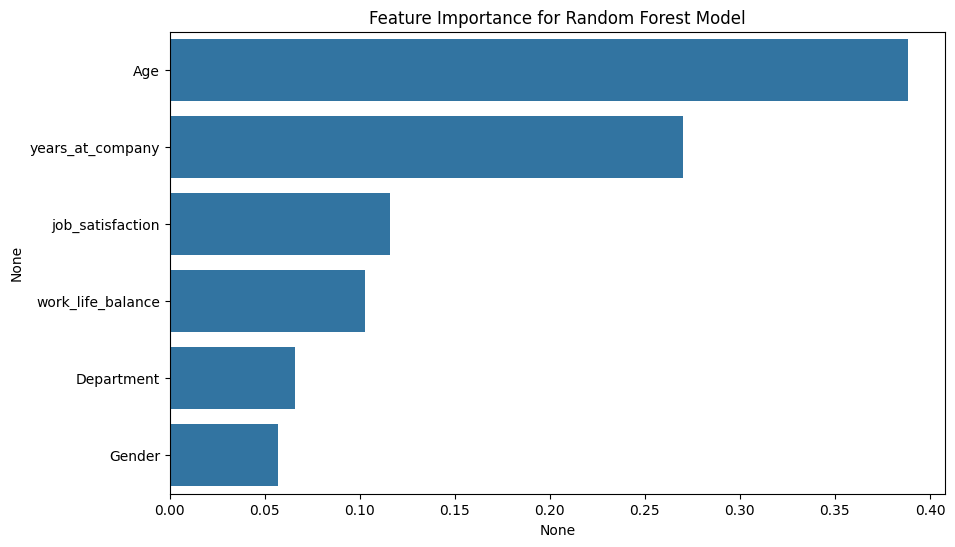

In [46]:
# Calculate feature importance for the random forest model
feature_importance = pd.Series(model_rf.feature_importances_, index=X.columns)


feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance for Random Forest Model')
plt.show()